In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [26]:
df = pd.read_csv("../data/adult.csv", index_col="id")
df = df[df != "?"]
mask = ((df["salary"] == "<=50K") & (df["salary K$"] <= 50)) | ((df["salary"] == ">50K") & (df["salary K$"] > 50))
df = df[mask]
df = df.rename(columns={"salary K$": "salary_k$"})
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary_k$
id,,,,,,,,,,,,
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40


# Task 1
Print the count of men and women in the dataset.

In [4]:
men_count = len(df[df["sex"] == "Male"].index)
women_count = len(df[df["sex"] == "Female"].index)
men_count, women_count

(21790, 10771)

# Task 2
Find the average age of men in dataset

In [5]:
avg_men_age = df[df["sex"] == "Male"]["age"].mean()
avg_men_age

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [6]:
poland_pct = len(df[df["native-country"] == "Poland"].index) / len(df.index) * 100
poland_pct

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [27]:
over_50k_age = df[df["salary_k$"] > 50]["age"]
over_50k_mean_age = over_50k_age.mean()
over_50k_std_age = over_50k_age.std()

below_50k_age = df[df["salary_k$"] <= 50]["age"]
below_50k_mean_age = below_50k_age.mean()
below_50k_std_age = below_50k_age.std()

over_50k_mean_age, over_50k_std_age, below_50k_mean_age, below_50k_std_age

(44.24984058155847, 10.519027719851826, 36.78373786407767, 14.02008849082488)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [28]:
high_educ = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df[~df.education.isin(high_educ) & (df["salary_k$"] > 50)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary_k$
id,,,,,,,,,,,,
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
27,54,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,60,South,>50K,275
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,NaN,>50K,166
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
...,...,...,...,...,...,...,...,...,...,...,...,...
32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,NaN,>50K,212
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [18]:
df.groupby("education").describe()

age                                                       \
                count       mean        std   min    25%   50%   75%   max   
education                                                                    
10th            933.0  37.429796  16.720713  17.0  22.00  34.0  52.0  90.0   
11th           1175.0  32.355745  15.545485  17.0  18.00  28.0  43.0  90.0   
12th            433.0  32.000000  14.334625  17.0  19.00  28.0  41.0  79.0   
1st-4th         168.0  46.142857  15.615625  19.0  33.00  46.0  57.0  90.0   
5th-6th         333.0  42.885886  15.557285  17.0  29.00  42.0  54.0  84.0   
7th-8th         646.0  48.445820  16.092350  17.0  34.25  50.0  61.0  90.0   
9th             514.0  41.060311  15.946862  17.0  28.00  39.0  54.0  90.0   
Assoc-acdm     1067.0  37.381443  11.095177  19.0  29.00  36.0  44.0  90.0   
Assoc-voc      1382.0  38.553546  11.631300  19.0  30.00  37.0  46.0  84.0   
Bachelors      5355.0  38.904949  11.912210  19.0  29.00  37.0  46.0  90.0   
Doctorate       413.0  47.702179  11.784716  24.0  39.00  47.0  55.0  80.0   
HS-grad       10501.0  38.974479  13.541524  17.0  28.00  37.0  48.0  90.0   
Masters        1723.0  44.049913  11.068935  18.0  36.00  43.0  51.0  90.0   
Preschool        51.0  42.764706  15.126914  19.0  31.00  41.0  53.5  75.0   
Prof-school     576.0  44.746528  11.962477  25.0  36.00  43.0  51.0  90.0   
Some-college   7291.0  35.756275  13.474051  17.0  24.00  34.0  45.0  90.0   

             hours-per-week             ...             salary K$              \
                      count       mean  ...   75%   max     count        mean   
education                               ...                                     
10th                  933.0  37.052519  ...  40.0  99.0     933.0   42.839228   
11th                 1175.0  33.925957  ...  40.0  99.0    1175.0   40.612766   
12th                  433.0  35.780600  ...  40.0  99.0     433.0   42.914550   
1st-4th               168.0  38.255952  ...  40.0  96.0     168.0   37.279762   
5th-6th               333.0  38.897898  ...  40.0  84.0     333.0   40.339339   
7th-8th               646.0  39.366873  ...  40.0  99.0     646.0   42.371517   
9th                   514.0  38.044747  ...  40.0  99.0     514.0   42.558366   
Assoc-acdm           1067.0  40.504217  ...  45.0  99.0    1067.0   74.993440   
Assoc-voc            1382.0  41.610709  ...  45.0  99.0    1382.0   76.188133   
Bachelors            5355.0  42.614006  ...  50.0  99.0    5355.0  101.882353   
Doctorate             413.0  46.973366  ...  55.0  99.0     413.0  154.125908   
HS-grad             10501.0  40.575374  ...  42.0  99.0   10501.0   59.573469   
Masters              1723.0  43.836332  ...  50.0  99.0    1723.0  123.163088   
Preschool              51.0  36.647059  ...  40.0  75.0      51.0   32.627451   
Prof-school           576.0  47.425347  ...  55.0  99.0     576.0  154.435764   
Some-college         7291.0  38.852284  ...  43.0  99.0    7291.0   64.214785   

                                                            
                     std   min   25%    50%     75%    max  
education                                                   
10th           45.825943  15.0  25.0   33.0   43.00  347.0  
11th           44.638571  15.0  24.0   32.0   41.50  345.0  
12th           48.118195  15.0  24.0   33.0   42.00  349.0  
1st-4th        32.745055  15.0  24.0   32.5   42.00  279.0  
5th-6th        43.082740  15.0  23.0   33.0   43.00  347.0  
7th-8th        46.883574  15.0  24.0   33.0   43.00  347.0  
9th            49.175715  15.0  24.0   33.0   42.00  349.0  
Assoc-acdm     86.975212  15.0  26.5   38.0   49.00  349.0  
Assoc-voc      86.673738  15.0  27.0   39.0   62.75  349.0  
Bachelors     101.141882  15.0  29.0   44.0  171.00  349.0  
Doctorate     100.973940  15.0  48.0  149.0  237.00  349.0  
HS-grad        72.797540  15.0  25.0   35.0   46.00  349.0  
Masters       104.275174  15.0  35.0   80.0  203.50  349.0  
Preschool       9.3

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [52]:
married_men = df[df["marital-status"].str.startswith("Married")]["salary_k$"].mean()
non_married_men = df[~df["marital-status"].str.startswith("Married")]["salary_k$"].mean()
married_men, non_married_men

(105.98735162482973, 42.71762715818945)

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [38]:
max_hours = df["hours-per-week"].max()
same_amount = df.groupby("hours-per-week").size()
same_amount

hours-per-week
1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Length: 94, dtype: int64

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

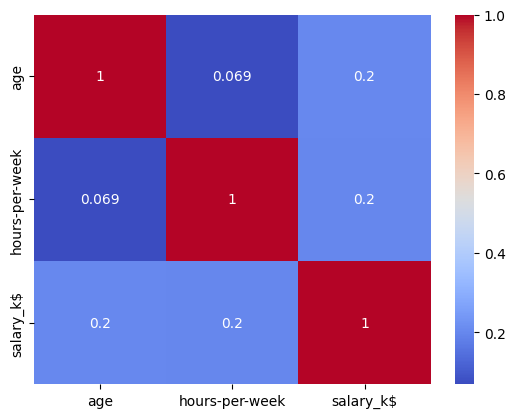

In [51]:
correlation_mx = df.corr(numeric_only=True)

sns.heatmap(correlation_mx, annot=True, cmap="coolwarm")
plt.show()